This shows a typical example of how a lack of type validation can make it unnecessarily hard to debug simple errors, like misspelling a config value.

In the below example, the AWS region name is misspelled, but it is not clear from the error message what exactly went wrong:

In [5]:
import boto3
from sagemaker.workflow.pipeline_context import PipelineSession
from sagemaker.session import get_execution_role

AWS_REGION = 'us-east1'  # Missing dashb between east and 1'

boto_session = boto3.Session(region_name=AWS_REGION)
sm_client = boto_session.client("sagemaker")
sm_pipeline_session = PipelineSession(
    boto_session=boto_session,
    sagemaker_client=sm_client,
)
role = get_execution_role(sagemaker_session=sm_pipeline_session)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/thomas-22/.config/sagemaker/config.yaml


TypeError: 'NoneType' object is not subscriptable

What happens is that the endpoint name can't be resolved, as the region is not found. But instead of either handling this (e.g., by trying to find the region in which the code is running, and using that instead), or raising a meaningful Error that tells the user that the value for region was not found, construct_endpoint() seems to return `None` rather than the dictionary with endpoint data. Thus, when stst_regional_endpoint() looks for the hostname in the dictionary, it fails because it doesn't know it may also receive `None` instead of a dictionary.

This could easily be prevented by using type hints + type checking, though the below code shows that this part of Sagemaker SDK is not typed yet.

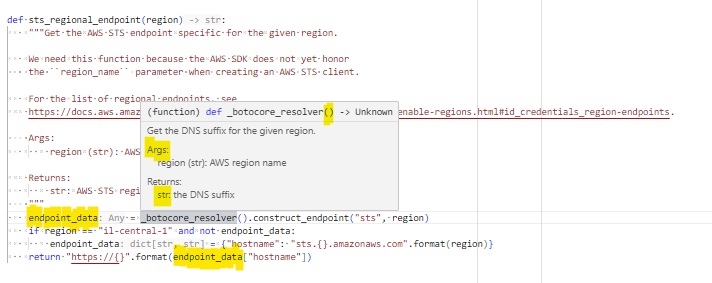

Note that there are also additional problems in this code, in particular the documentation of argument and return types is outdated.